<a href="https://colab.research.google.com/github/ayanoglu/Denoising-Autoencoder/blob/main/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
 -- GOAL 1 -- 


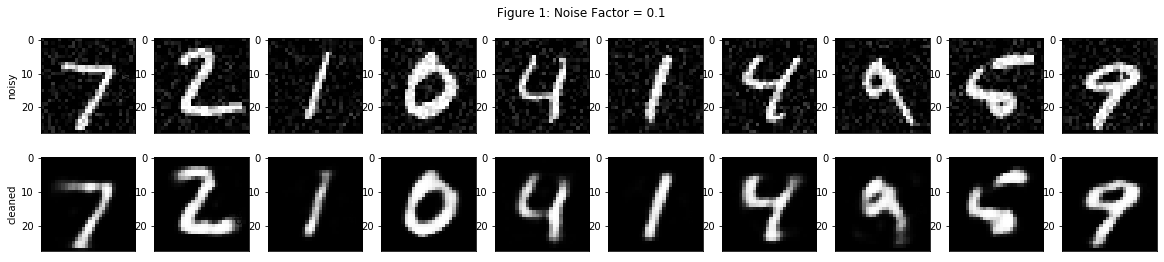

 
 
 -- GOAL 2 -- 


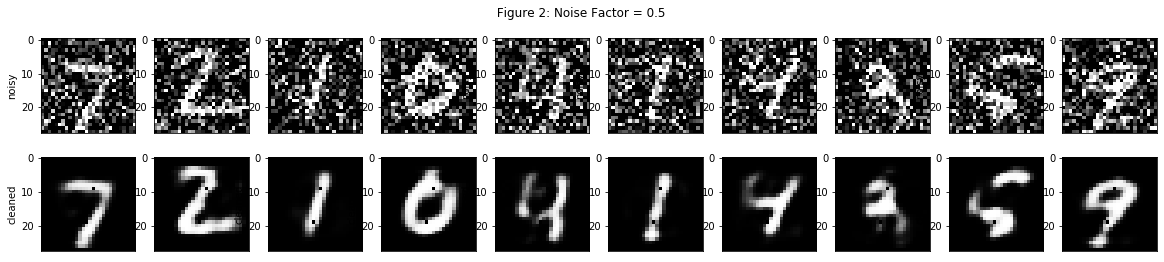

 
 
 -- GOAL 3 -- 


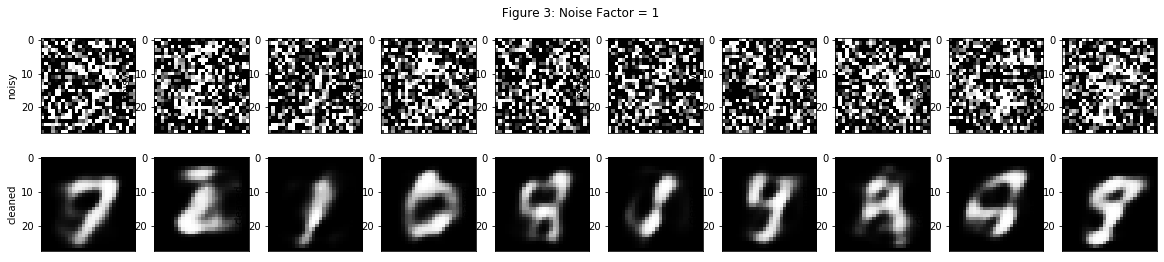

 
 
 -- GOAL 4 -- 
   The top rows of the figures are the noisy digits for each noise factor we applied (0.1, 0.5 and 1.0), 
and the bottom rows of the figures are the reconstructed digits (belonging to the given noise factor).  
   As the noise factor gets larger, the reconstructed image looses some features or gaines some additional 
features sourced by the noise (for example an additional dot sometimes appears on the left side of digit 7
for NF=0.5). Increasing the number of epochs solves some of theses issues (additional dot on left side of
digit 7 is fixed with epoch num=20). But then some additional features started occuring on other digits, 
therefore I decided to keep the epoch number at 10. 
   Even though it is really difficult to make sense out of the noisy images of the Noise factor 1 group, 
the Autoencoder is capable of generating images that arensomewhat closer to representing a digit. This tells
us that the trained autoencoder through 60000 samples is easily capable of 

In [ ]:
import matplotlib.pyplot as plt 
from keras.datasets import mnist 
from keras.layers import Dense 
from keras.layers import Input
from keras.models import Model 
import numpy as np 

(trainX, trainY), (testX, testY) = mnist.load_data() 

trainX = trainX.astype('float32') / 255. 
testX = testX.astype('float32') / 255. 
trainX = trainX.reshape((len(trainX), np.prod(trainX.shape[1:]))) 
testX = testX.reshape((len(testX), np.prod(testX.shape[1:]))) 
 
################## 
noise_factor = 0.1 
noise = np.random.randn(*trainX.shape) * noise_factor 
trainX_noisy = trainX + noise 
trainX_noisy = np.clip(trainX_noisy, 0., 1.) 
noise = np.random.randn(*testX.shape) * noise_factor 
testX_noisy = testX + noise 
testX_noisy = np.clip(testX_noisy, 0., 1.) 
################## 

input_img = Input(shape=(784,)) 
encoded = Dense(32, activation='relu')(input_img) 
decoded = Dense(784, activation='sigmoid')(encoded)  
autoencoder = Model(input_img, decoded) 
encoder = Model(input_img, encoded) 
encoded_input = Input(shape=(32,)) 
decoder_layer = autoencoder.layers[-1] 
decoder = Model(encoded_input, decoder_layer(encoded_input)) 

################## 
autoencoder.compile(optimizer='SGD', loss='categorical_crossentropy') 

##################
autoencoder.fit(trainX_noisy, trainX, epochs=10, batch_size=128, shuffle=True, validation_data=(testX_noisy, testX), verbose=0) 

################# 
encoded_imgs = encoder.predict(testX_noisy) 
decoded_imgs = decoder.predict(encoded_imgs) 

################# 
print(" ") 
print(" -- GOAL 1 -- ") 
n = 10 
plt.figure(figsize=(20, 4)) 
for i in range(n): 
    ax = plt.subplot(2, n, i + 1)
    plt.ylabel('noisy')  
    plt.imshow(testX_noisy[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(True) 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.ylabel('cleaned')     
    plt.imshow(decoded_imgs[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(True) 
    plt.suptitle(' Figure 1: Noise Factor = 0.1 ') 
plt.show() 
################################################################################ 
noise_factor = 0.5 
noise = np.random.randn(*trainX.shape) * noise_factor 
trainX_noisy = trainX + noise 
trainX_noisy = np.clip(trainX_noisy, 0., 1.) 
noise = np.random.randn(*testX.shape) * noise_factor 
testX_noisy = testX + noise 
testX_noisy = np.clip(testX_noisy, 0., 1.) 
################## 
autoencoder.fit(trainX_noisy, trainX, epochs=20, batch_size=128, shuffle=True, validation_data=(testX_noisy, testX), verbose=0) 
################## 
encoded_imgs = encoder.predict(testX_noisy) 
decoded_imgs = decoder.predict(encoded_imgs) 
################## 
print(" ") 
print(" ") 
print(" -- GOAL 2 -- ") 
n = 10 
plt.figure(figsize=(20, 4)) 
for i in range(n): 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(testX_noisy[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(True)
    plt.ylabel('noisy')  
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(decoded_imgs[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(True)
    plt.ylabel('cleaned')  
    plt.suptitle(' Figure 2: Noise Factor = 0.5 ') 
plt.show() 
################################################################################ 
noise_factor = 1 
noise = np.random.randn(*trainX.shape) * noise_factor 
trainX_noisy = trainX + noise 
trainX_noisy = np.clip(trainX_noisy, 0., 1.) 
noise = np.random.randn(*testX.shape) * noise_factor 
testX_noisy = testX + noise 
testX_noisy = np.clip(testX_noisy, 0., 1.) 
################## 
autoencoder.fit(trainX_noisy, trainX, epochs=10, batch_size=128, shuffle=True, validation_data=(testX_noisy, testX), verbose=0) 
################## 
encoded_imgs = encoder.predict(testX_noisy) 
decoded_imgs = decoder.predict(encoded_imgs) 
################## 
print(" ") 
print(" ") 
print(" -- GOAL 3 -- ") 
n = 10
plt.figure(figsize=(20, 4)) 
for i in range(n): 
    ax = plt.subplot(2, n, i + 1) 
    plt.ylabel('noisy')     
    plt.imshow(testX_noisy[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(True)
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.ylabel('cleaned')  
    plt.imshow(decoded_imgs[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(True)
    plt.suptitle(' Figure 3: Noise Factor = 1 ') 
plt.show() 
print(" ") 
print(" ") 
print(""" -- GOAL 4 -- 
   The top rows of the figures are the noisy digits for each noise factor we applied (0.1, 0.5 and 1.0), 
and the bottom rows of the figures are the reconstructed digits (belonging to the given noise factor).  
   As the noise factor gets larger, the reconstructed image looses some features or gaines some additional 
features sourced by the noise (for example an additional dot sometimes appears on the left side of digit 7
for NF=0.5). Increasing the number of epochs solves some of theses issues (additional dot on left side of
digit 7 is fixed with epoch num=20). But then some additional features started occuring on other digits, 
therefore I decided to keep the epoch number at 10. 
   Even though it is really difficult to make sense out of the noisy images of the Noise factor 1 group, 
the Autoencoder is capable of generating images that arensomewhat closer to representing a digit. This tells
us that the trained autoencoder through 60000 samples is easily capable of proper weight assigments even with 
such noisy images. """) 
